В этом проекты буду пробовать реализоватвывать KAn еть через ЧАТ ГПТ

In [85]:
from kan import *


In [86]:
import matplotlib.pyplot as plt

In [142]:
import pandas as pd
from sklearn.model_selection import train_test_split
from kan import *

# Загрузка данных
data = pd.read_csv('file_for_input/all_hour/ABIO_tradestats_test_hour.csv')

# Признаки (X) — все столбцы, кроме целевой переменной
X = data[['vol','val','trades','trades_b','trades_s', 'val_b','val_s','vol_b','vol_s','pr_open_hour','pr_high_hour','pr_low_hour']] # Можно добавить и другие важные признаки


# Целевая переменная (Y) — это `pr_close_hour`
Y = data['pr_close_hour']

train_size = int(0.8 * len(data))
X_train, X_test = X[:train_size], X[train_size:]
Y_train, Y_test = Y[:train_size], Y[train_size:]
# 
# # Разделение данных на обучающую и тестовую выборки
# X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2) # был ещё аргумент , random_state=42


In [143]:
print (X_train.head(10) )
print ("-----------------------------")
print (Y_train )
print ("-----------------------------")
print (X_test )
print ("-----------------------------")
print (Y_test )


      vol         val  trades  trades_b  trades_s      val_b      val_s  \
0  9545.0  10498806.0   647.0     351.0     296.0  4947693.0  5551106.0   
1  7182.0   7970286.0   474.0     307.0     167.0  4723090.0  3247191.0   
2  6334.0   6979144.0   535.0     131.0     404.0  1294238.0  5684902.0   
3  4975.0   5459314.0   421.0     247.0     174.0  3092682.0  2366628.0   
4  1377.0   1517088.0   113.0      62.0      51.0   995961.0   521124.0   
5   971.0   1074412.0   143.0      81.0      62.0   753162.0   321246.0   
6   643.0    713016.0    93.0      54.0      39.0   354972.0   358041.0   
7  2180.0   2401506.0   213.0      77.0     136.0   544072.0  1857432.0   
8  4194.0   4618863.0   173.0      95.0      78.0  2263743.0  2355117.0   
9  6827.0   7444111.0   544.0     221.0     323.0  2122451.0  5321659.0   

    vol_b   vol_s  pr_open_hour  pr_high_hour  pr_low_hour  
0  4490.0  5055.0        110.66        111.04       108.56  
1  4257.0  2925.0        110.40        111.50       

In [144]:
# Преобразование данных в тензоры для использования с KAN
X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
Y_train_tensor = torch.tensor(Y_train.values, dtype=torch.float32).unsqueeze(1)  # добавляем ось для соответствия размерностей

X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32)


In [145]:
# Инициализация KAN модели
device = 'cuda' if torch.cuda.is_available() else 'cpu'  # Выбор устройства
model = KAN(width=[X_train.shape[1], 1, 1], grid=3, k=3, seed=1, device=device)



checkpoint directory created: ./model
saving model version 0.0


In [146]:
# Настройка оптимизатора и функции потерь
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
loss_fn = torch.nn.MSELoss()


Epoch 1/200, Loss: 149104820224.0
Epoch 2/200, Loss: 144842031104.0
Epoch 3/200, Loss: 140734201856.0
Epoch 4/200, Loss: 136775434240.0
Epoch 5/200, Loss: 132960215040.0
Epoch 6/200, Loss: 129282891776.0
Epoch 7/200, Loss: 125738000384.0
Epoch 8/200, Loss: 122320142336.0
Epoch 9/200, Loss: 119024459776.0
Epoch 10/200, Loss: 115842359296.0
Epoch 11/200, Loss: 112766967808.0
Epoch 12/200, Loss: 109794058240.0
Epoch 13/200, Loss: 106919788544.0
Epoch 14/200, Loss: 104140496896.0
Epoch 15/200, Loss: 101452636160.0
Epoch 16/200, Loss: 98852806656.0
Epoch 17/200, Loss: 96337887232.0
Epoch 18/200, Loss: 93904986112.0
Epoch 19/200, Loss: 91551145984.0
Epoch 20/200, Loss: 89273352192.0
Epoch 21/200, Loss: 87068483584.0
Epoch 22/200, Loss: 84934057984.0
Epoch 23/200, Loss: 82867740672.0
Epoch 24/200, Loss: 80867377152.0
Epoch 25/200, Loss: 78930812928.0
Epoch 26/200, Loss: 77056065536.0
Epoch 27/200, Loss: 75241127936.0
Epoch 28/200, Loss: 73484107776.0
Epoch 29/200, Loss: 71783170048.0
Epoch 30

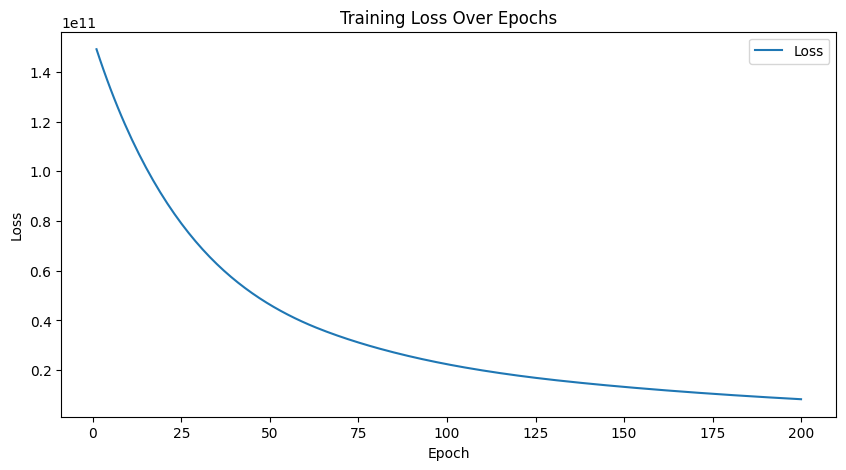

In [148]:
# Обучение модели
epochs = 200
batch_size = 32
losses = []

for epoch in range(epochs):
    model.train()
    
    optimizer.zero_grad()  # обнуление градиентов
    
    # Прямой проход
    y_pred = model(X_train_tensor)
    
    # Вычисление ошибки
    loss = loss_fn(y_pred, Y_train_tensor)
    losses.append(loss.item())  # Сохраняем значение loss
    
    # Обратный проход и обновление весов
    loss.backward()
    optimizer.step()
    
    print(f'Epoch {epoch+1}/{epochs}, Loss: {loss.item()}')

# График функции потерь
plt.figure(figsize=(10, 5))
plt.plot(range(1, epochs + 1), losses, label='Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Over Epochs')
plt.legend()
plt.show()

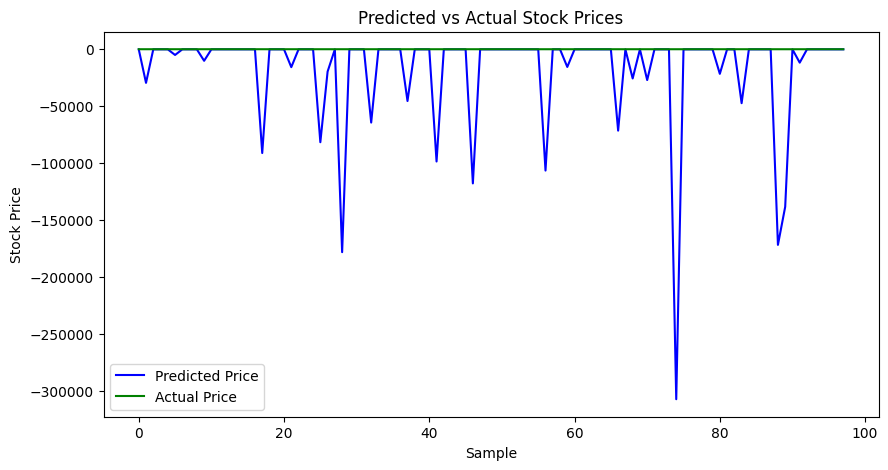

In [149]:
# Предсказание на тестовой выборке
model.eval()
with torch.no_grad():
    predicted_price = model(X_test_tensor)

# Преобразование предсказаний и реальных значений в numpy для визуализации
predicted_price = predicted_price.cpu().numpy()
Y_test_numpy = Y_test_tensor.cpu().numpy()

# График предсказанных и реальных значений
plt.figure(figsize=(10, 5))
plt.plot(predicted_price, label='Predicted Price', color='blue')
plt.plot(Y_test_numpy, label='Actual Price', color='green')
plt.xlabel('Sample')
plt.ylabel('Stock Price')
plt.title('Predicted vs Actual Stock Prices')
plt.legend()
plt.show()